In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Added for heatmap later if needed

# --- Our ML tools ---
from sklearn.model_selection import train_test_split
# We need the Encoder from last time for 'sex'
from sklearn.preprocessing import OneHotEncoder # Example if we didn't use get_dummies
from sklearn.ensemble import RandomForestClassifier # <-- The star of the show!

# --- Our Evaluation tools ---
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Load the Data ---
df = sns.load_dataset('titanic')
print("--- Raw Data ---")
print(df.head())



--- Raw Data ---
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [2]:

# --- 2. Prepare the Data ---
# Select features and handle missing age
df_clean = df[['survived', 'pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']].copy() # Added sibsp/parch
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())

# One-Hot Encode 'sex' (using get_dummies is easiest)
df_clean = pd.get_dummies(df_clean, columns=['sex'], drop_first=True)

print("\n--- Clean, Encoded Data ---")
print(df_clean.head())

# --- Define X and y ---
X = df_clean.drop('survived', axis=1)
y = df_clean['survived']

# --- Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Scale Data? ---
# Vijay: "Do we need StandardScaler?"
# AK: "Nope! Random Forest (like Decision Trees) doesn't need it!" 😄




--- Clean, Encoded Data ---
   survived  pclass   age     fare  sibsp  parch  sex_male
0         0       3  22.0   7.2500      1      0      True
1         1       1  38.0  71.2833      1      0     False
2         1       3  26.0   7.9250      0      0     False
3         1       1  35.0  53.1000      1      0     False
4         0       3  35.0   8.0500      0      0      True


In [3]:

# --- 3. Create & Train ---
# 1. Import (done)
# 2. Create instance
#    Let's use 100 trees as a good starting point
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. TRAIN!
# This builds 100 slightly different trees using our random tricks
print("\n...Training the Random Forest (100 trees)...")
model.fit(X_train, y_train) # Using unscaled data!
print("...Forest Grown!...")




...Training the Random Forest (100 trees)...
...Forest Grown!...



--- Model Evaluation ---
Accuracy: 80.45%
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179


--- Feature Importances ---
    Feature  Importance
2      fare    0.291130
5  sex_male    0.280818
1       age    0.257658
0    pclass    0.086700
3     sibsp    0.047756
4     parch    0.035939


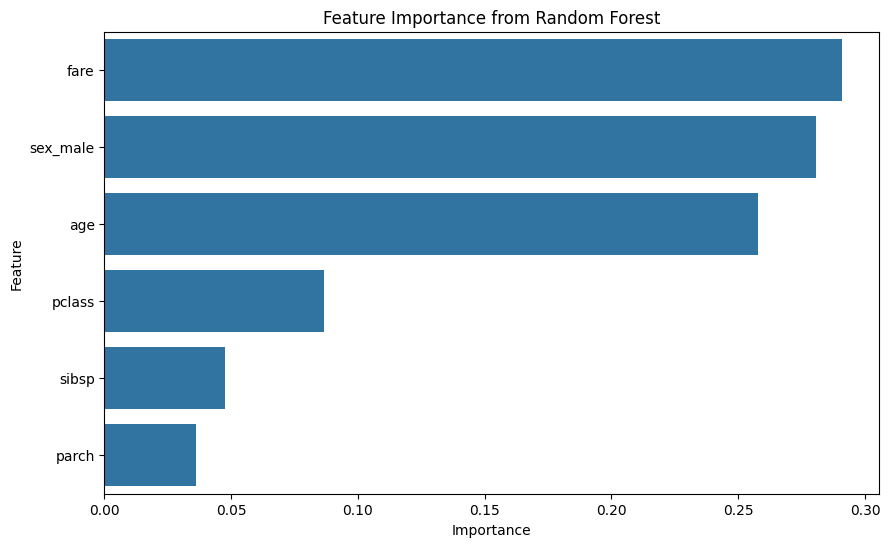

In [4]:

# --- 4. Predict & Evaluate ---
y_pred = model.predict(X_test)

print("\n--- Model Evaluation ---")
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%")
print(classification_report(y_test, y_pred))

# --- Feature Importance! ---
print("\n--- Feature Importances ---")
importances = model.feature_importances_
feature_names = X.columns
# Combine names and scores, then sort
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Optional: Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

